In [716]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.preprocessing import OneHotEncoder

In [717]:
dataset = pd.read_excel('../data/boxScores.xlsx')

In [718]:
dataset = dataset[dataset['MIN'] != 0]
dataset.describe()

,GAME DATE,MIN,PTS,FGM,FGA,3PM,3PA,FTM,FTA,OREB,...,PF,+/-,FP,Last3_FP_Avg,Last3_Min,Last5_FP_Avg,Last5_Min,Last7_FP_Avg,Last7_Min,Season_FP_Avg
count,9982,9982.000000,9982.000000,9982.000000,9982.000000,9982.000000,9982.000000,9982.000000,9982.000000,9982.000000,...,9982.000000,9982.000000,9982.000000,9982.000000,9982.000000,9982.000000,9982.000000,9982.000000,9982.000000,9982.000000
mean,2024-11-22 14:11:51.200160256,22.482068,10.529253,3.836806,8.263474,1.261170,3.502104,1.594470,2.046584,1.012222,...,1.785514,-0.000701,21.593288,21.480266,22.362369,21.392051,22.268400,21.322921,22.201792,21.574098
min,2024-10-22 00:00:00,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,-43.000000,-3.000000,-1.000000,0.666667,-1.000000,1.000000,-1.000000,1.000000,-1.000000
25%,2024-11-06 00:00:00,14.000000,3.000000,1.000000,4.000000,0.000000,1.000000,0.000000,0.000000,0.000000,...,1.000000,-7.000000,9.700000,11.437500,14.666667,11.661667,14.800000,11.728571,14.723214,12.375000
50%,2024-11-21 12:00:00,24.000000,9.000000,3.000000,7.000000,1.000000,3.000000,1.000000,1.000000,1.000000,...,2.000000,0.000000,19.800000,20.066667,23.333333,20.000000,23.200000,19.900000,23.285714,20.084375
75%,2024-12-08 00:00:00,31.000000,16.000000,6.000000,12.000000,2.000000,5.000000,2.000000,3.000000,2.000000,...,3.000000,7.000000,31.200000,29.891667,30.666667,29.675000,30.600000,29.480357,30.428571,28.750000
max,2024-12-28 00:00:00,48.000000,60.000000,22.000000,39.000000,10.000000,20.000000,17.000000,26.000000,12.000000,...,6.000000,43.000000,98.300000,80.500000,44.666667,75.360000,44.000000,72.200000,44.000000,63.355556
std,NaN,10.847488,8.817063,3.234562,6.034359,1.537369,3.171918,2.246381,2.715058,1.343533,...,1.452097,11.310923,14.981087,13.138480,10.047682,12.732902,9.865021,12.570748,9.792995,11.903855


In [719]:
clusterdf = pd.read_excel('../data/clusteredPlayers.xlsx')

In [720]:
clusterdf = clusterdf.drop('Unnamed: 0', axis=1)
clusterdf.head()

,Player,Cluster
0,Anthony Black,13
1,Bennedict Mathurin,4
2,Clint Capela,3
3,De'Aaron Fox,8
4,Jake LaRavia,2


In [721]:
clusterDict = {}

In [722]:
clusterDict.update(pd.Series(clusterdf['Cluster'].values, index=clusterdf['Player']).to_dict())

In [723]:
dataset['CLUSTER'] = dataset['PLAYER'].map(clusterDict).astype('category')

In [724]:
dataset['CLUSTER'] = dataset['CLUSTER'].replace(clusterDict)
dataset.sort_values(by=['GAME DATE'], ascending = [False], inplace=True)

In [725]:
# Remove players without a cluster
dataset = dataset.dropna(subset=['CLUSTER'])
dataset.describe()


,GAME DATE,MIN,PTS,FGM,FGA,3PM,3PA,FTM,FTA,OREB,...,PF,+/-,FP,Last3_FP_Avg,Last3_Min,Last5_FP_Avg,Last5_Min,Last7_FP_Avg,Last7_Min,Season_FP_Avg
count,7538,7538.000000,7538.000000,7538.000000,7538.000000,7538.000000,7538.000000,7538.000000,7538.000000,7538.000000,...,7538.000000,7538.000000,7538.000000,7538.000000,7538.000000,7538.000000,7538.000000,7538.000000,7538.000000,7538.000000
mean,2024-11-22 12:56:44.192093440,26.475458,12.720483,4.628283,9.919209,1.529185,4.205625,1.934731,2.462192,1.153622,...,2.046431,0.195145,25.763956,25.650294,26.363956,25.571644,26.282005,25.510521,26.222466,25.757884
min,2024-10-22 00:00:00,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,-43.000000,-2.800000,-1.000000,1.000000,-1.000000,1.000000,-1.000000,1.000000,8.088889
25%,2024-11-06 00:00:00,20.000000,6.000000,2.000000,6.000000,0.000000,2.000000,0.000000,0.000000,0.000000,...,1.000000,-8.000000,15.200000,16.933333,21.000000,17.100000,21.000000,17.189286,20.857143,17.867857
50%,2024-11-21 00:00:00,27.000000,11.000000,4.000000,9.000000,1.000000,4.000000,1.000000,2.000000,1.000000,...,2.000000,0.000000,24.400000,24.200000,26.666667,24.163333,26.600000,24.100000,26.666667,23.887500
75%,2024-12-08 00:00:00,33.000000,18.000000,7.000000,13.000000,2.000000,6.000000,3.000000,4.000000,2.000000,...,3.000000,8.000000,34.575000,33.000000,32.666667,32.560000,32.333333,32.435714,32.191667,32.138462
max,2024-12-28 00:00:00,48.000000,60.000000,22.000000,39.000000,10.000000,20.000000,17.000000,26.000000,12.000000,...,6.000000,43.000000,98.300000,80.500000,44.666667,75.360000,44.000000,72.200000,44.000000,63.355556
std,NaN,8.552300,8.730300,3.208314,5.793261,1.618032,3.222691,2.388939,2.871715,1.414594,...,1.433306,12.305830,14.161038,11.917093,7.522340,11.403899,7.279630,11.191780,7.176671,10.321330


In [726]:
cluster0 = dataset[dataset['CLUSTER'] == 0]
cluster1 = dataset[dataset['CLUSTER'] == 1]
cluster2 = dataset[dataset['CLUSTER'] == 2] 
cluster3 = dataset[dataset['CLUSTER'] == 3]
cluster4 = dataset[dataset['CLUSTER'] == 4]
cluster5 = dataset[dataset['CLUSTER'] == 5]
cluster6 = dataset[dataset['CLUSTER'] == 6]
cluster7 = dataset[dataset['CLUSTER'] == 7]
cluster8 = dataset[dataset['CLUSTER'] == 8]
cluster9 = dataset[dataset['CLUSTER'] == 9]
cluster10 = dataset[dataset['CLUSTER'] == 10]
cluster11 = dataset[dataset['CLUSTER'] == 11]
cluster12 = dataset[dataset['CLUSTER'] == 12]
cluster13 = dataset[dataset['CLUSTER'] == 13]
cluster14 = dataset[dataset['CLUSTER'] == 14]

In [727]:

dataset.head(15)

,PLAYER,TEAM,MATCH UP,GAME DATE,W/L,MIN,PTS,FGM,FGA,FG%,...,+/-,FP,Last3_FP_Avg,Last3_Min,Last5_FP_Avg,Last5_Min,Last7_FP_Avg,Last7_Min,Season_FP_Avg,CLUSTER
6550,Lonzo Ball,CHI,CHI vs. MIL,2024-12-28,W,19,9,3,5,60.0,...,-17,18.1,14.200000,17.333333,20.14,18.8,19.357143,18.714286,18.230769,14.0
3620,Isaiah Collier,UTA,UTA vs. PHI,2024-12-28,L,19,2,1,3,33.3,...,-12,6.6,11.300000,22.666667,9.58,19.2,8.714286,17.714286,10.827273,0.0
5411,Josh Green,CHA,CHA vs. OKC,2024-12-28,L,39,10,3,9,33.3,...,-12,20.9,14.800000,33.333333,12.28,31.4,15.314286,31.142857,15.665517,5.0
992,Brandin Podziemski,GSW,GSW vs. PHX,2024-12-28,W,11,0,0,1,0.0,...,-17,2.4,13.800000,22.000000,18.70,22.4,20.214286,21.857143,20.766667,14.0
6031,Kevin Durant,PHX,PHX @ GSW,2024-12-28,L,37,31,10,24,41.7,...,-17,46.7,45.700000,37.666667,47.18,36.6,47.542857,36.714286,43.704762,4.0
563,Anthony Davis,LAL,LAL vs. SAC,2024-12-28,W,39,36,12,16,75.0,...,21,64.0,39.466667,28.333333,46.34,31.4,48.800000,32.285714,52.740000,9.0
7119,Miles McBride,NYK,NYK @ WAS,2024-12-28,W,19,3,1,5,20.0,...,-3,7.5,11.866667,23.666667,14.76,22.4,17.242857,23.142857,19.533333,14.0
7092,Miles Bridges,CHA,CHA vs. OKC,2024-12-28,L,38,19,5,16,31.3,...,-3,46.0,46.633333,33.666667,39.38,32.4,37.842857,30.714286,33.211111,5.0
6059,Kevin Huerter,SAC,SAC @ LAL,2024-12-28,L,24,9,4,7,57.1,...,1,16.7,19.066667,23.333333,17.08,23.4,21.357143,23.857143,20.317857,11.0
5131,Jonas Valančiūnas,WAS,WAS vs. NYK,2024-12-28,L,21,8,4,9,44.4,...,-8,27.1,36.566667,24.333333,29.60,20.6,24.142857,18.428571,26.675862,9.0


In [742]:
dfFeatures = dataset[['Last3_FP_Avg', 'Last5_FP_Avg', 'Last7_FP_Avg', 'Season_FP_Avg', 'CLUSTER']]
dfLabels = dataset['FP']
dfFeatures = pd.get_dummies(dfFeatures, columns=['CLUSTER'], drop_first=True)

In [729]:
labels = np.array(dfLabels)
features = np.array(dfFeatures)

In [730]:
train, test, train_labels, test_labels = train_test_split(features, labels, test_size=0.25, random_state=4)

In [731]:
reg = RandomForestRegressor(
    random_state=4,
)
reg.fit(train, train_labels)

RandomForestRegressor(random_state=4)

In [732]:
train_predictions = reg.predict(train)
predictions = reg.predict(test)

In [733]:
feature_columns = dfFeatures.columns
df = pd.DataFrame(test, columns = feature_columns)
df['Actual'] = test_labels
df['Predicted'] = predictions
df['Error'] = abs(df['Actual'] - df['Predicted'])

In [734]:
df.describe()

,Actual,Predicted,Error
count,1885.000000,1885.000000,1885.000000
mean,25.764987,25.503181,6.387521
std,13.920979,12.183199,5.130906
min,-2.000000,0.088000,0.001000
25%,15.500000,16.645000,2.250000
50%,24.500000,24.115000,5.167000
75%,34.400000,32.744000,9.195000
max,86.100000,75.868000,33.505000


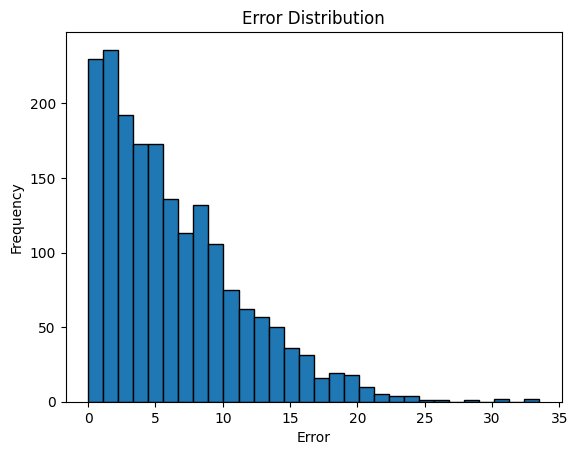

In [735]:
import matplotlib.pyplot as plt

plt.hist(df['Error'], bins=30, edgecolor='k')
plt.xlabel('Error')
plt.ylabel('Frequency')
plt.title('Error Distribution')
plt.show()

In [736]:
dfgood = df0[(df0['Error']<5)]
dfgood.describe()

,Last3_FP_Avg,Last5_FP_Avg,Last7_FP_Avg,Season_FP_Avg,Actual,Predicted,Error
count,46.000000,46.000000,46.000000,46.000000,46.000000,46.000000,46.000000
mean,24.202899,24.010290,23.901542,24.691092,23.367391,23.909065,2.611109
std,8.856858,7.770034,7.092973,3.974060,8.914908,8.509406,1.507027
min,1.200000,1.200000,1.200000,18.230769,1.200000,3.372000,0.051000
25%,19.200000,19.465000,19.707143,21.066176,17.025000,17.242500,1.545000
50%,23.216667,24.500000,24.342857,24.220000,22.900000,24.072500,2.408000
75%,30.133333,29.290000,27.739286,27.228226,29.500000,32.060500,3.776750
max,46.200000,40.740000,39.171429,32.458333,40.400000,39.259000,4.978000


In [737]:
# Identfy unique list of cluster to loop over
clusterdf.head()

,Player,Cluster
0,Anthony Black,13
1,Bennedict Mathurin,4
2,Clint Capela,3
3,De'Aaron Fox,8
4,Jake LaRavia,2


In [738]:
clusterList = clusterdf['Cluster'].tolist()

In [739]:
uniqueClusterList = list(set(clusterList))
uniqueClusterList

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14]

In [740]:
ClusterError = 0
for cluster in uniqueClusterList:
    clusterdf = dataset[dataset['CLUSTER'] == cluster]
    dfFeatures = clusterdf[['Last3_FP_Avg', 'Last5_FP_Avg', 'Last7_FP_Avg', 'Season_FP_Avg']]
    dfLabels = clusterdf[['FP']]

    labels = np.array(dfLabels).ravel()
    features = np.array(dfFeatures)

    train, test, train_labels, test_labels = train_test_split(features, labels, test_size=0.25, random_state=4)

    reg = RandomForestRegressor(random_state=4)
    reg.fit(train, train_labels)

    train_predictions = reg.predict(train)
    predictions = reg.predict(test)

    df0 = pd.DataFrame(test, columns = ['Last3_FP_Avg', 'Last5_FP_Avg', 'Last7_FP_Avg', 'Season_FP_Avg'])
    df0['Actual'] = test_labels
    df0['Predicted'] = predictions
    df0['Error'] = abs(df0['Actual'] - df0['Predicted'])
    ClusterError += df0['Error'].mean()

    print(f"Cluster {cluster} average error is {df0['Error'].mean()}")
avgClusterError = ClusterError/len(uniqueClusterList)
print(f"Average error across clusters is: {avgClusterError}")

Cluster 0 average error is 6.605333333333332
Cluster 1 average error is 5.29756140350877
Cluster 2 average error is 8.073781250000001
Cluster 3 average error is 6.84271698113208
Cluster 4 average error is 6.155934426229511
Cluster 5 average error is 6.734639024390242
Cluster 6 average error is 5.489916666666668
Cluster 7 average error is 5.3871052631578955
Cluster 8 average error is 8.00133777777778
Cluster 9 average error is 7.924469800569799
Cluster 10 average error is 5.862307692307693
Cluster 11 average error is 5.826317757009346
Cluster 12 average error is 7.068564285714287
Cluster 13 average error is 6.2888363636363644
Cluster 14 average error is 7.1087521367521385
Average error across clusters is: 6.57783827747906
